# Trabalho 01: Filtros de Fase Linear e Janelamento

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Parte 01

### Questão 01
Gere um sinal de entrada x[n] que é a soma de três funções cosseno com frequências 
angulares   iguais   a   0,2π,   0,5π   e   0,8π,   e   amplitudes   iguais   a  1.  Este  sinal   deve   possuir 
N=200 pontos. Gere o gráfico do módulo da Transformada de Fourier deste sinal x[n] 
em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de 
comentário em seu código, se a módulo da Transformada de Fourier está de acordo com o 
esperado. 

1. Criando o sinal x[n]

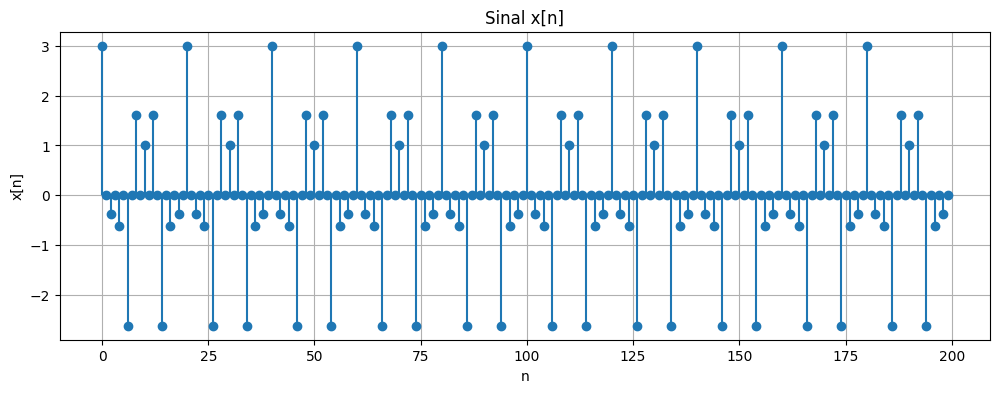

In [8]:
# Número de pontos
N = 200

# Vetor de amostras
n = np.arange(N)

# Criando os cossenos
x1_n = np.cos(0.2 * np.pi * n)
x2_n = np.cos(0.5 * np.pi * n)
x3_n = np.cos(0.8 * np.pi * n)

x_n = x1_n + x2_n + x3_n

# Plotando o sinal x_n
plt.figure(figsize=(12,4))
plt.stem(n, x_n, basefmt=" ")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Sinal x[n]")
plt.grid(True)
plt.show()

2. Fazendo a transformada de Fourier discreta:

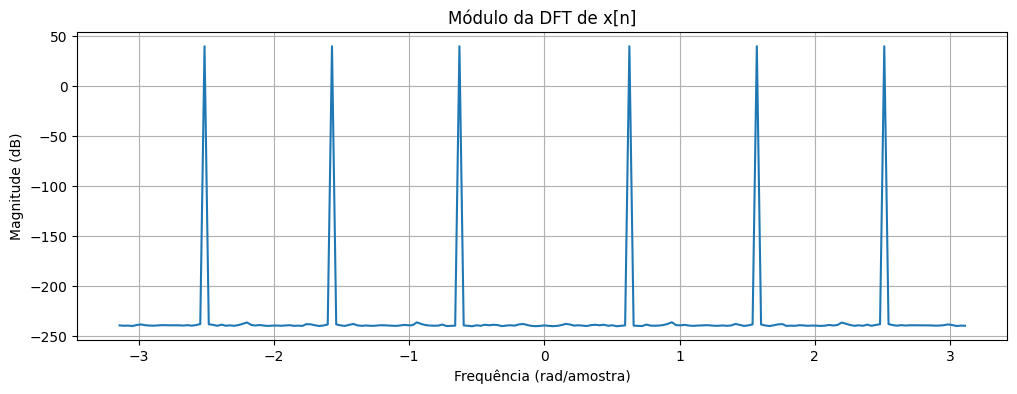

In [6]:
X = np.fft.fft(x_n)
# centralizando em -π..π (Detalhes do python)
X_shift = np.fft.fftshift(X)     

# Calculando magnitude em dB
mag = np.abs(X_shift)
mag_db = 20 * np.log10(mag + 1e-12) 

# Eixo de frequência em rad/amostra
omega = np.linspace(-np.pi, np.pi, N, endpoint=False)

# Plotando o gráfico do módulo da FFT
plt.figure(figsize=(12,4))
plt.plot(omega, mag_db)
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.title("Módulo da DFT de x[n]")
plt.grid(True)
plt.show()


#### Explicação

Sim, o módulo da Tranformada de Fourier saiu como esperado, já que o sinal analisado é composto de cossenos com frequências 0.2, 0.5 e 0.8 radianos por amostra:

$$
x[n] = \cos(0.2\pi n) + \cos(0.5\pi n) + \cos(0.8\pi n)
$$


Como já é conhecido, a transformada de fourier de um cosseno são dois impulsos simétricos na mesma frequência do cosseno (isso é esperado, já que a TF extrai as frequências características de um sinal e o cosseno possui apenas 1 frequência).

Como a transformada de Fourier é linear (obedece a superposição e Homogeneidade), a transformada de fourier do sinal $x_n$ é a soma das TF dos sinais que a compoem:

$$ 
X(e^{j\omega}) = \mathcal{F}\{x[n]\} = \mathcal{F}\{\cos(0.2\pi n)\} +  \mathcal{F}\{\cos(0.5\pi n)\} + \mathcal{F}\{\cos(0.8\pi n)\}
$$

Como cada cosseno gera dois picos simétricos em frequência, espera-se observar picos em:

$$
|\omega| = \{0.2\pi,\; 0.5\pi,\; 0.8\pi\}
$$

Que são justamente os valores:
$$
|\omega| = \{0.628,\; 1.571,\; 2.513\}
$$

Em que estão os picos no gráfico do módulo da transformada de Fourier de $x_n$



### Questão 02: 
Gere  a  resposta   ao   impulso  h[n]  de   um  filtro   passa-baixa   FIR   usando   truncamento 
(janela retangular) a partir um filtro passa-baixa ideal com frequência de corte igual a 0,65π  
e atraso α=15. A resposta ao impulso deste filtro deve ser não nula de 0 até M=2 α=30. Gere 
o gráfico do módulo da Resposta em Frequência deste sistema em dB  (ou seja, da 
Transformada   de   Fourier  da   resposta   ao   impulso   h[n]).   Não   esqueça   de   colocar   as 
frequências   corretas   no   eixo   x.  Explique,   em   forma   de   comentário   em   seu   código,   se   a 
módulo da Resposta em Frequência  está de acordo com o esperado. 
